# Jayden Jayawardhena

## Research question/interests

I am interested in which metal oxides are present at various temperatures and humidities and what that means for air quality at those temperatures and humidities.

In [66]:
import pandas as pd
import numpy as np

data = pd.read_csv("../data/raw/AirQuality.csv",sep=';')
data = data.drop(['Unnamed: 15','Unnamed: 16','NMHC(GT)'],axis=1)
data = data.dropna(how='any')
data = data[(data != -200).all(1)]

display(data)



,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


# EDA

[Text(0.5, 1.0, 'Average Titanium Dioxide Detections Throught The Day'),
 Text(0.5, 0, '24-Hour Time'),
 Text(0, 0.5, 'Sensor Detections')]

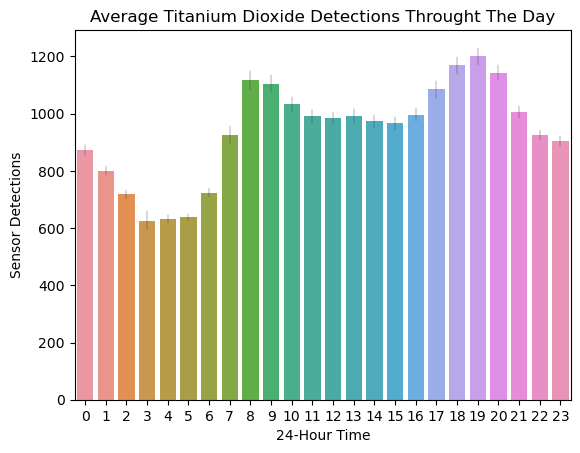

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

data['datetime'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['month'] = data['datetime'].dt.month_name()
data['month'] = data['month'].drop(data.loc[data.month == 'May'].index)
data['Time'] = data['Time'].astype(str).apply(lambda x : x[0:2]).astype(int)


sns.barplot(data,x='Time',y='PT08.S2(NMHC)',errwidth=0.3).set(title='Average Titanium Dioxide Detections Throught The Day',xlabel='24-Hour Time',ylabel='Sensor Detections')


[Text(0.5, 1.0, 'Titanium Dioxide Detection from 2004 to 2005'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Detections')]

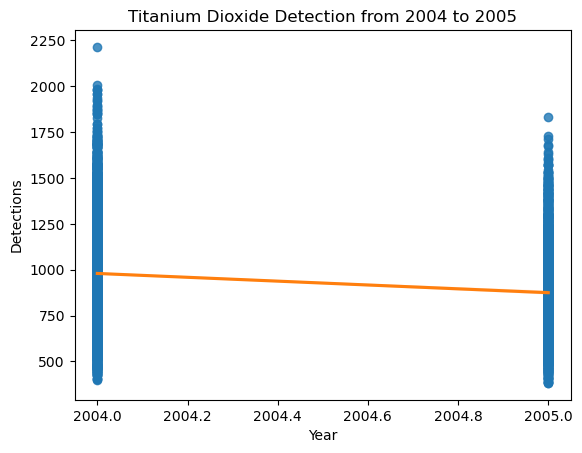

In [83]:
sns.regplot(data,x=data['datetime'].dt.year,y='PT08.S2(NMHC)',line_kws={"color": "C1"},order=1).set(title="Titanium Dioxide Detection from 2004 to 2005",xlabel="Year",ylabel="Detections")

There is no significant evidence of a change in the detection of Titanium Dioxide from 2004 to 2005

In [69]:
data['T'] = data['T'].astype(str).replace(",",".",regex=True).astype(float)
data['RH'] = data['RH'].astype(str).replace(",",".",regex=True).astype(float)
data['AH'] = data['AH'].astype(str).replace(",",".",regex=True).astype(float)

print("Mean Temp:",np.mean(data['T'])) #The mean of the datasets temperature
print("Mean AH:",np.mean(data['AH']))
print("Mean RH:",np.mean(data['RH']))

Mean Temp: 17.964804544839712
Mean AH: 0.9947571351278236
Mean RH: 48.77544974976329


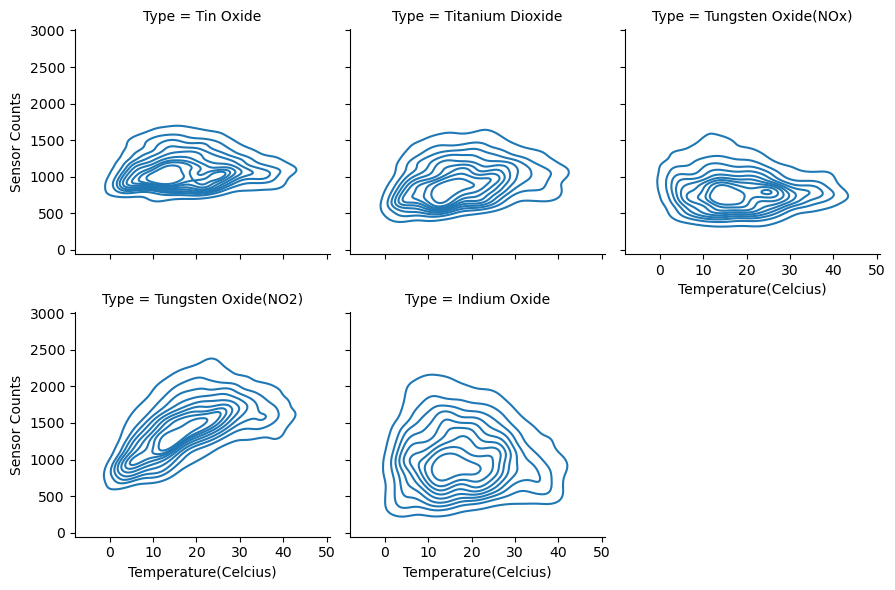

In [70]:
def toCommonName(name):
    if name == 'PT08.S1(CO)':
        return "Tin Oxide"
    elif name == 'PT08.S2(NMHC)':
        return "Titanium Dioxide"
    elif name == 'PT08.S3(NOx)':
        return "Tungsten Oxide(NOx)"
    elif name == 'PT08.S4(NO2)':
        return "Tungsten Oxide(NO2)"
    elif name == 'PT08.S5(O3)':
        return "Indium Oxide"
    else:
        return "Unknown"
            
def toMetalDataTbl(colName: str):
    df = pd.DataFrame()
    df['T'] = data['T']
    df['RH'] = data['RH']
    df['AH'] = data['AH']
    df['Value'] = data[colName]
    df['Type'] = toCommonName(colName)

    return df

metalData = pd.DataFrame(columns=['T','RH','AH','Value','Type'])
metalData = pd.concat([metalData,
                       toMetalDataTbl("PT08.S1(CO)"),
                       toMetalDataTbl("PT08.S2(NMHC)"),
                       toMetalDataTbl("PT08.S3(NOx)"),
                       toMetalDataTbl("PT08.S4(NO2)"),
                       toMetalDataTbl("PT08.S5(O3)")
                       ])

g = sns.FacetGrid(metalData,col='Type',col_wrap=3)
g.map(sns.kdeplot,"T","Value").set(xlabel="Temperature(Celcius)",ylabel="Sensor Counts")

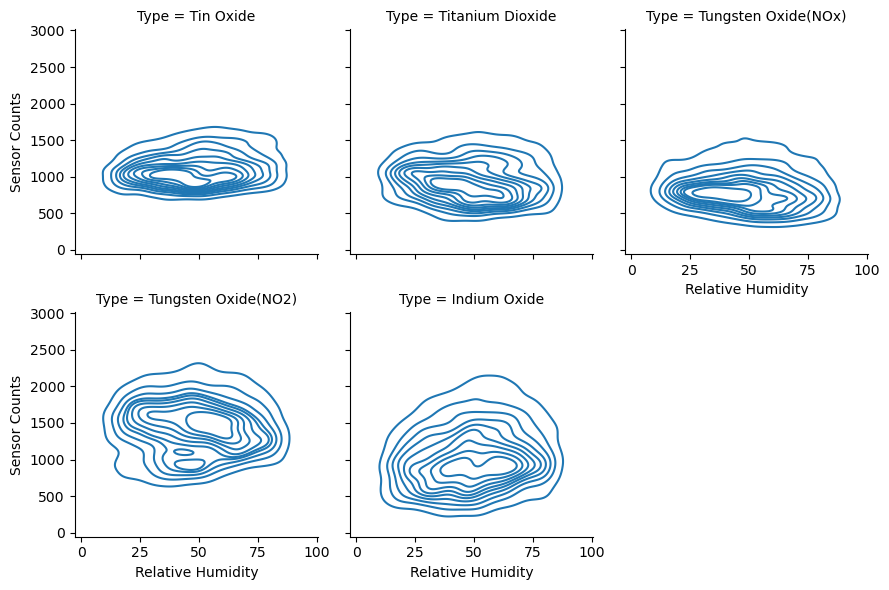

In [71]:
g = sns.FacetGrid(metalData,col='Type',col_wrap=3)
g.map(sns.kdeplot,"RH","Value").set(xlabel="Relative Humidity",ylabel="Sensor Counts")

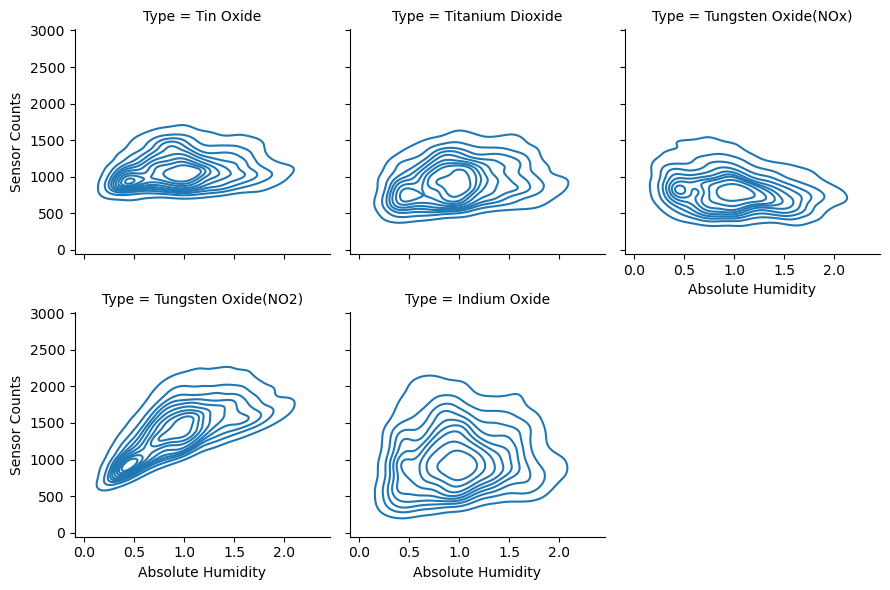

In [72]:
g = sns.FacetGrid(metalData,col='Type',col_wrap=3)
g.map(sns.kdeplot,"AH","Value").set(xlabel="Absolute Humidity",ylabel="Sensor Counts")